In [2]:
#Phase 1: Data Acquisition & Loading

In [3]:
import pandas as pd
# Load the dataset
df = pd.read_csv("My Uber Drives - 2016.csv")
# View the first 5 rows
print(df.head())

# View the shape of the dataset (rows, columns)
print("Shape:", df.shape)

# View summary info (column types, non-null counts)
print(df.info())

# View basic statistics (only for numeric columns)
print(df.describe())

# Check for missing values in each column
print(df.isnull().sum())


      START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit  
Shape: (1156, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-nul

In [ ]:
 #Phase 2: Data Cleaning

In [18]:
import pandas as pd

# Step 1: Load and clean column names
df = pd.read_csv("My Uber Drives - 2016.csv")
df.columns = df.columns.str.strip().str.lower().str.replace("*", "", regex=False).str.replace(" ", "_")

# Step 2: Remove rows like "Totals" that are not actual rides
df = df[df['start_date'] != 'Totals']

# Step 3: Convert 'start_date' and 'end_date' to datetime
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Step 4: Drop rows where dates couldn't be parsed
df = df.dropna(subset=['start_date', 'end_date'])

# Step 5: Remove duplicates
df = df.drop_duplicates()

# Step 6: Clean text columns
df['category'] = df['category'].str.strip().str.title()
for col in ['start', 'stop', 'purpose']:
    df[col] = df[col].astype(str).str.strip()

# Step 7: Drop rows with missing trip purpose (optional, if focusing on purpose analysis)
df_cleaned = df.dropna(subset=['purpose'])

# Step 8: Final check
print("✅ Data cleaned. Summary:")
print(df_cleaned.info())
print("\nMissing values:")
print(df_cleaned.isnull().sum())


✅ Data cleaned. Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  1154 non-null   datetime64[ns]
 1   end_date    1154 non-null   datetime64[ns]
 2   category    1154 non-null   object        
 3   start       1154 non-null   object        
 4   stop        1154 non-null   object        
 5   miles       1154 non-null   float64       
 6   purpose     1154 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.1+ KB
None

Missing values:
start_date    0
end_date      0
category      0
start         0
stop          0
miles         0
purpose       0
dtype: int64


In [ ]:
# Phase 3: EDA — Overview

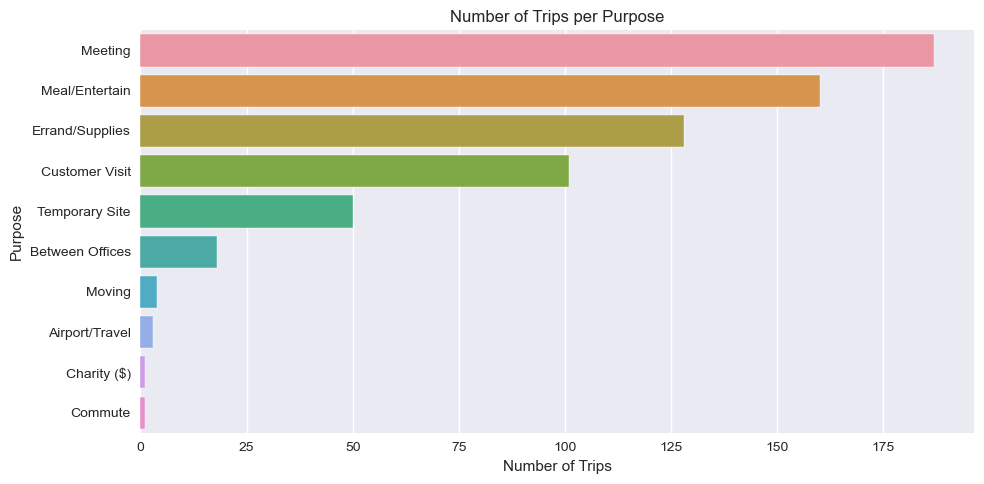

In [8]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nicer plots
plt.style.use('seaborn-v0_8')  # Updated style name for Matplotlib 3.6+
sns.set_palette("Set2")
%matplotlib inline

# --- Load & Clean Data ---
df = pd.read_csv("My Uber Drives - 2016.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace("*", "", regex=False).str.replace(" ", "_")

# Remove footer row if present
df = df[df['start_date'] != 'Totals']

# Convert date columns
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Remove rows with invalid dates
df.dropna(subset=['start_date', 'end_date'], inplace=True)

# Convert 'miles' to numeric
df['miles'] = pd.to_numeric(df['miles'], errors='coerce')

# Drop rows with missing miles
df.dropna(subset=['miles'], inplace=True)

# --- EDA Visualizations ---

# 1. Trips per Purpose
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='purpose', order=df['purpose'].value_counts().index)
plt.title('Number of Trips per Purpose')
plt.xlabel('Number of Trips')
plt.ylabel('Purpose')
plt.tight_layout()
plt.show()




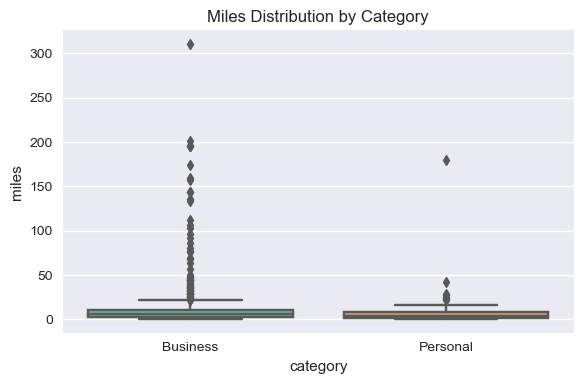

In [9]:
# 2. Miles by Category (Business vs Personal)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='category', y='miles')
plt.title('Miles Distribution by Category')
plt.tight_layout()
plt.show()



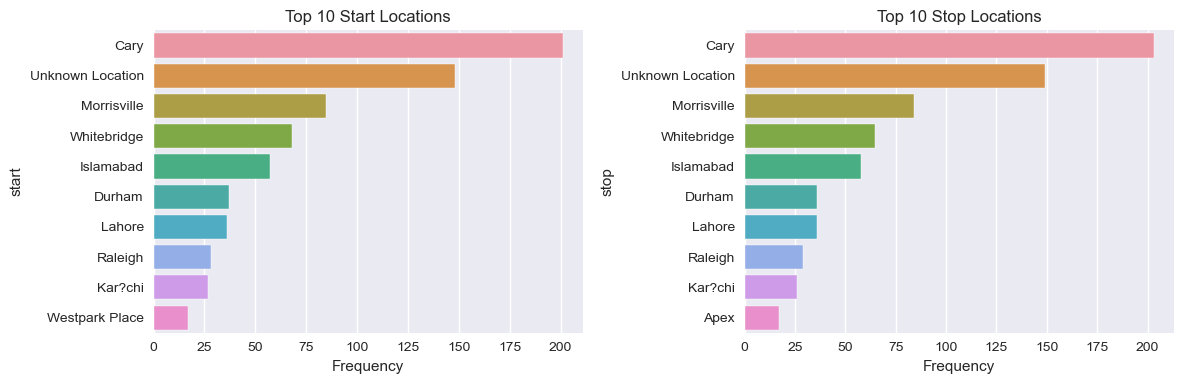

In [10]:
# 3. Most frequent Start and Stop locations
top_starts = df['start'].value_counts().head(10)
top_stops = df['stop'].value_counts().head(10)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.barplot(y=top_starts.index, x=top_starts.values)
plt.title('Top 10 Start Locations')
plt.xlabel('Frequency')

plt.subplot(1, 2, 2)
sns.barplot(y=top_stops.index, x=top_stops.values)
plt.title('Top 10 Stop Locations')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()



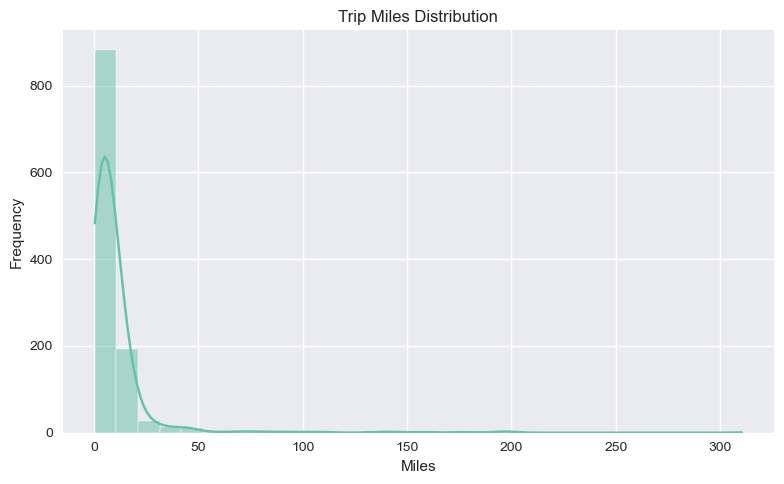

In [11]:
# 4. Trip Miles Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['miles'], bins=30, kde=True)
plt.title('Trip Miles Distribution')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


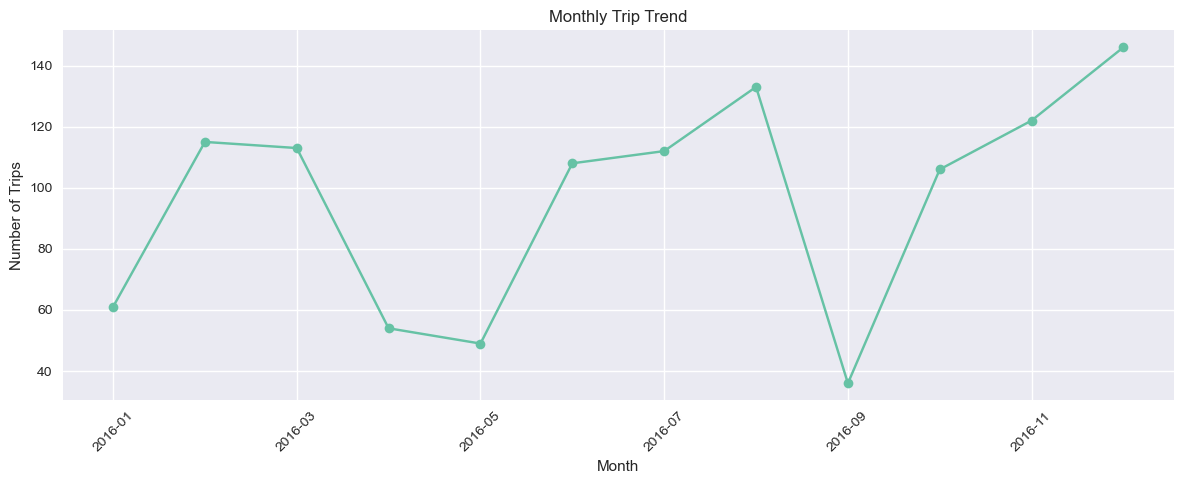

In [12]:

# 5. Monthly Trip Trend
df['month'] = df['start_date'].dt.to_period('M').astype(str)

monthly_trips = df.groupby('month').size()

plt.figure(figsize=(12, 5))
monthly_trips.plot(kind='line', marker='o')
plt.title('Monthly Trip Trend')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Phase 4: Feature Engineering & Modeling

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Upload CSV if using Google Colab or Jupyter
# from google.colab import files
# uploaded = files.upload()

# Load your CSV file here
df = pd.read_csv("My Uber Drives - 2016.csv")  # <-- update the path accordingly

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace("*", "", regex=False).str.replace(" ", "_")

# Remove rows with 'totals'
df = df[~df['start_date'].str.contains("totals", case=False, na=False)]

# Convert to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Drop missing and duplicate data
df = df.dropna().drop_duplicates()

# Encode categorical variables
le = LabelEncoder()
df['purpose_encoded'] = le.fit_transform(df['purpose'])
df['category_encoded'] = le.fit_transform(df['category'])

# Prepare features and target
X = df[['category_encoded', 'miles']]
y = df['purpose_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      1.00      0.44         2
           3       0.00      0.00      0.00         0
           4       0.43      0.20      0.27        30
           5       0.40      0.71      0.52        24
           6       0.30      0.10      0.15        30
           7       0.18      0.07      0.10        28
           8       1.00      1.00      1.00         1
           9       0.10      0.20      0.13        15

    accuracy                           0.26       131
   macro avg       0.30      0.36      0.29       131
weighted avg       0.30      0.26      0.24       131


Confusion Matrix:
[[ 0  0  0  0  1  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 5  0  1  6  5  4  3  0  6]
 [ 2  0  0  1 17  2  0  0  2]
 [ 3  3  0  2 13  3  1  0  5]
 [ 1  1  0  4  5  1  2  0 14]
 [ 0  0  0  0  0  0  0  1  0]
 [ 4  1  0  1

In [ ]:
#Phase 5: Result Interpretation & Conclusion (with Python code)

Classification Report:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           4       0.44      0.21      0.29        38
           5       0.36      0.39      0.37        36
           6       0.40      0.45      0.42        51
           7       0.41      0.62      0.49        50
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00        16

    accuracy                           0.39       196
   macro avg       0.33      0.33      0.32       196
weighted avg       0.36      0.39      0.36       196


Confusion Matrix:



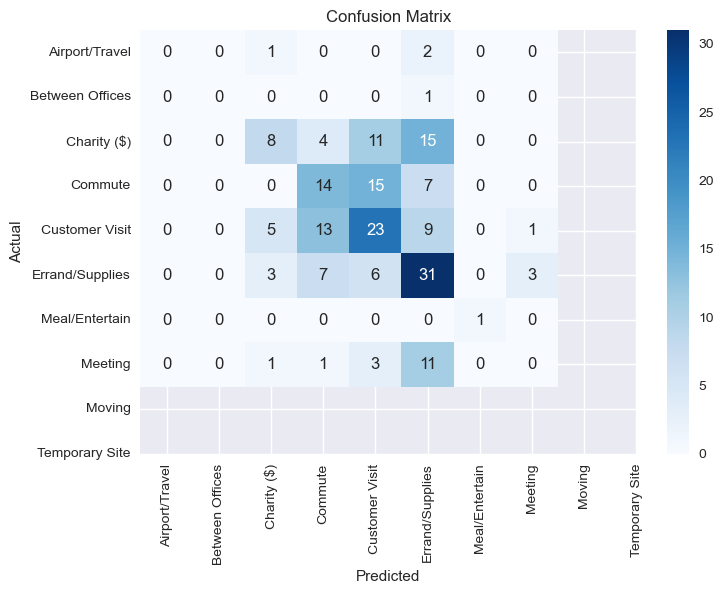

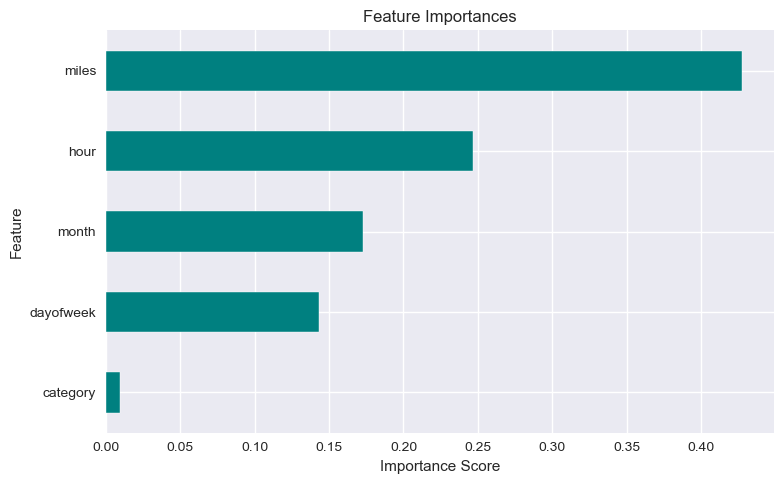

In [15]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# --- Load & Clean Data ---
df = pd.read_csv("My Uber Drives - 2016.csv")

# Clean columns
df.columns = df.columns.str.strip().str.lower().str.replace("*", "", regex=False).str.replace(" ", "_")

# Drop rows with missing values
df.dropna(inplace=True)

# Convert date columns
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Drop any remaining rows with invalid date parsing
df.dropna(subset=['start_date', 'end_date'], inplace=True)

# Feature Engineering
df['hour'] = df['start_date'].dt.hour
df['dayofweek'] = df['start_date'].dt.dayofweek
df['month'] = df['start_date'].dt.month

# Encode 'category' and 'purpose'
df['category'] = df['category'].astype('category').cat.codes
df['purpose'] = df['purpose'].astype('category')
df['purpose_code'] = df['purpose'].cat.codes

# --- Modeling ---
X = df[['miles', 'hour', 'dayofweek', 'month', 'category']]
y = df['purpose_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# --- Evaluation ---
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nConfusion Matrix:\n")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=df['purpose'].cat.categories, yticklabels=df['purpose'].cat.categories)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Feature Importance ---
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5), color='teal')
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
#Phase 6: Insights & Reporting

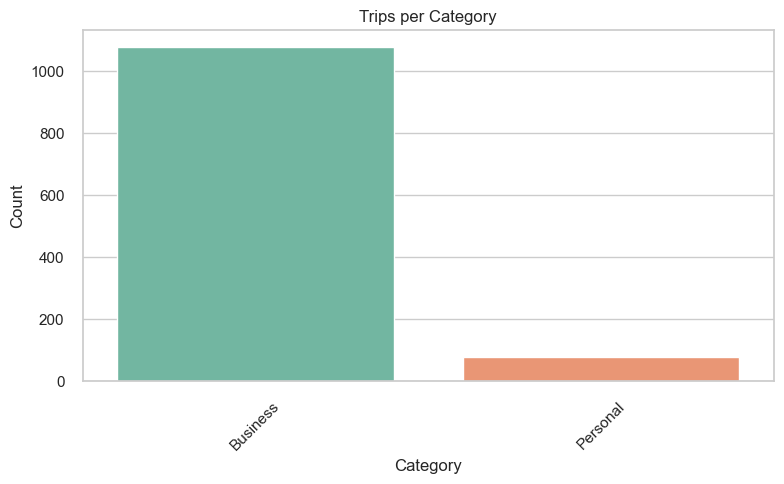

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('My Uber Drives - 2016.csv')

# Convert 'START_DATE*' to datetime, coerce errors to NaT
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], errors='coerce')

# Drop rows where 'START_DATE*' could not be converted
df_valid = df.dropna(subset=['START_DATE*']).copy()

# Extract hour, day of week, and month from 'START_DATE*'
df_valid['hour'] = df_valid['START_DATE*'].dt.hour
df_valid['dayofweek'] = df_valid['START_DATE*'].dt.day_name()
df_valid['month'] = df_valid['START_DATE*'].dt.month_name()

# Set seaborn style
sns.set(style="whitegrid", palette="Set2")

# 1. Trips per Category
plt.figure(figsize=(8, 5))
sns.countplot(data=df_valid, x='CATEGORY*')
plt.title('Trips per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





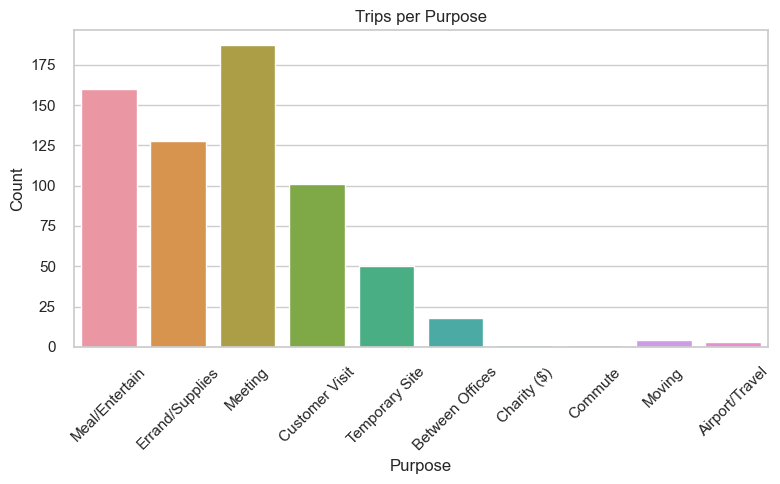

In [30]:
# 2. Trips per Purpose
plt.figure(figsize=(8, 5))
sns.countplot(data=df_valid, x='PURPOSE*')
plt.title('Trips per Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


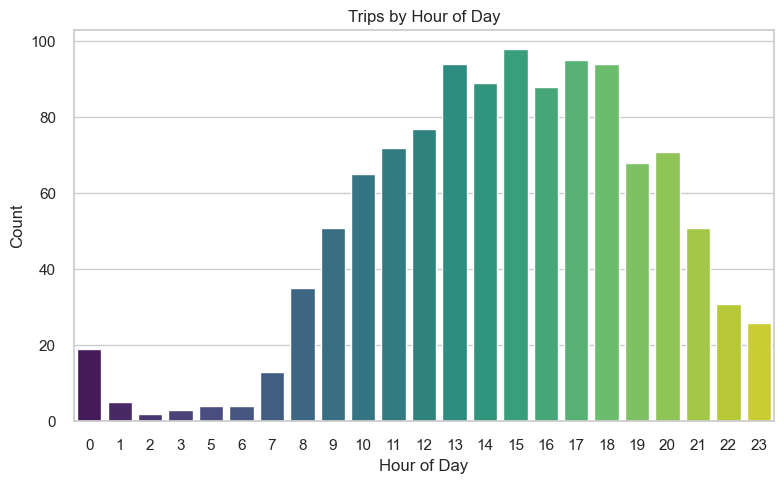

In [39]:
# 3. Trips by Hour of Day
plt.figure(figsize=(8, 5))
sns.countplot(data=df_valid, x='hour', palette='viridis')
plt.title('Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

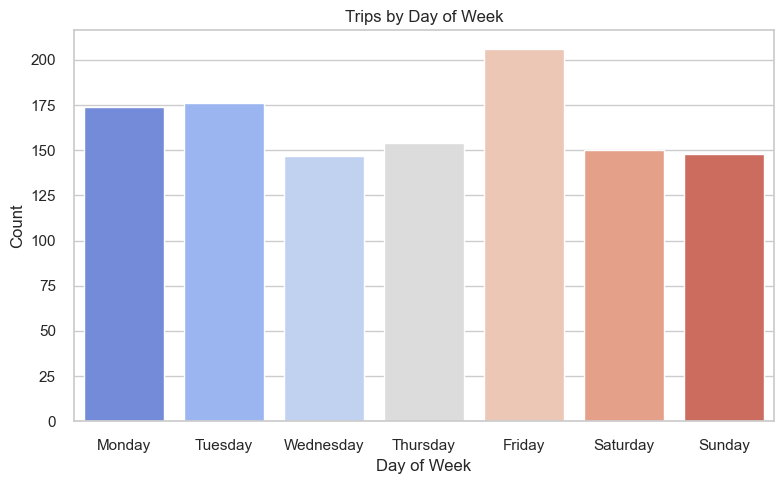

In [38]:
# 4. Trips by Day of Week
plt.figure(figsize=(8, 5))
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df_valid, x='dayofweek', order=order_days, palette='coolwarm')
plt.title('Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



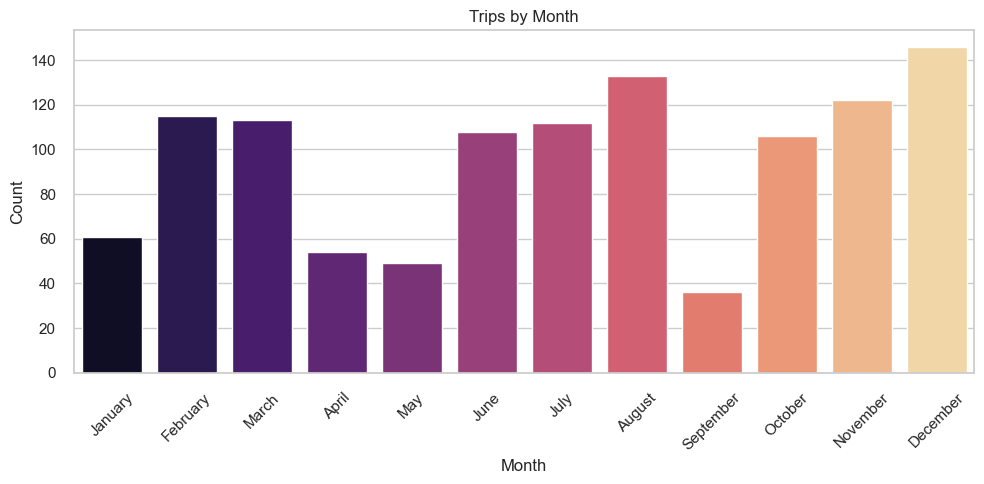

In [35]:
# 5. Trips by Month
plt.figure(figsize=(10, 5))
order_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=df_valid, x='month', order=order_months, palette='magma')
plt.title('Trips by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()